In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/NLP(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/NLP(2)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups #NewsGroup Document Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:

#categories = [
#              'sci.crypt',
 #   'sci.electronics',
 #   'sci.med',
 #   'sci.space']

ng_train = fetch_20newsgroups(subset='train'
                             , remove=('headers', 'footers', 'quotes')
                             #, categories=ng_train.target_names
                             )

ng_test = fetch_20newsgroups(subset='test'
                             , remove=('headers', 'footers', 'quotes')
                             #, categories=ng_train.target_names
                             )

In [6]:
len(ng_train.data), len(ng_test.data)

(11314, 7532)

In [7]:
ng_train.data[5]

'\n\n\n\n\nOf course.  The term must be rigidly defined in any bill.\n\n\nI doubt she uses this term for that.  You are using a quote allegedly\nfrom her, can you back it up?\n\n\n\n\nI read the article as presenting first an argument about weapons of mass\ndestruction (as commonly understood) and then switching to other topics.\nThe first point evidently was to show that not all weapons should be\nallowed, and then the later analysis was, given this understanding, to\nconsider another class.\n\n\n\n'

In [8]:
ng_train.target[:6]

array([ 7,  4,  4,  1, 14, 16])

In [9]:
ng_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
import explore_data as ed
import seaborn as sns

In [11]:
# Gets the median number of words per sample given corpus.
median_words_per_sample = ed.get_num_words_per_sample(ng_train.data)
print('Median words per sample: ', median_words_per_sample)

Median words per sample:  83.0


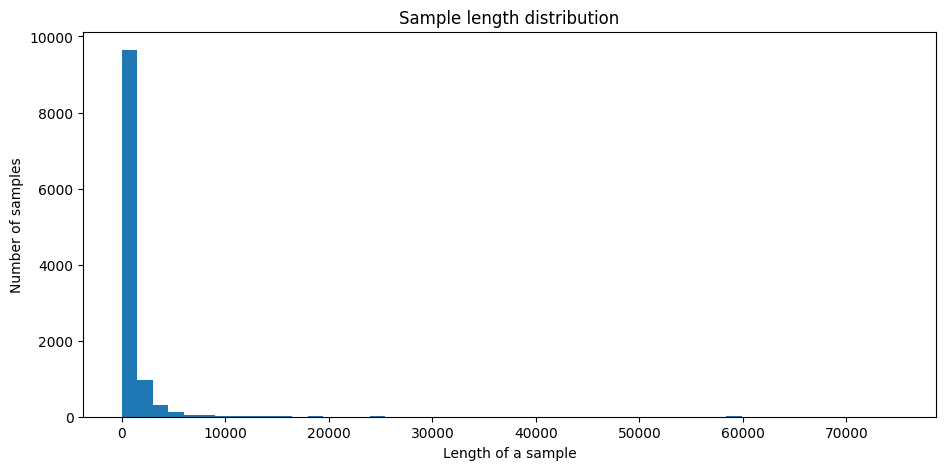

In [12]:
ed.plot_sample_length_distribution(ng_train.data)

In [13]:
x_train = ng_train.data
y_train = ng_train.target
x_test = ng_test.data
y_test = ng_test.target

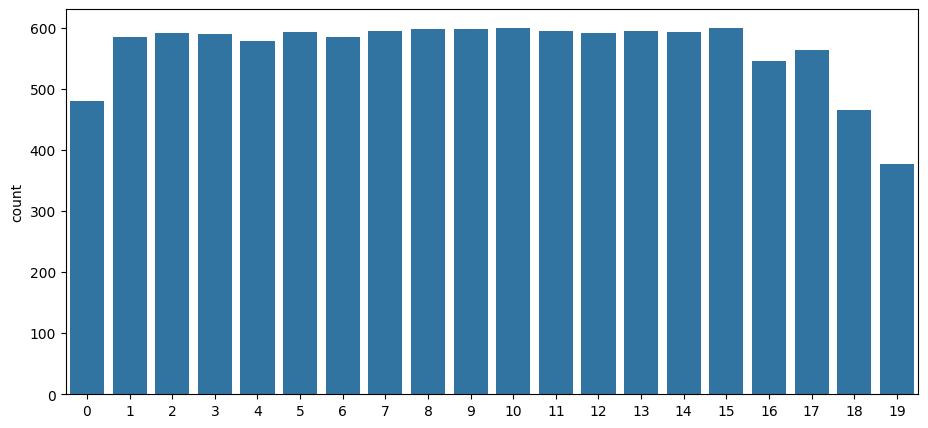

In [14]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 1 : DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 2 : Tfidf 행렬 생성
tfidf_matrix = TfidfTransformer()
x_train_tfidf = tfidf_matrix.fit_transform(x_train_dtm)
print(x_train_tfidf.shape)

x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)

x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)

(11314, 101631)
(11314, 101631)


In [ ]:
print(x_test[0])
print(y_test[0])

I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.
7


In [ ]:
x_train1.shape

(11314, 100)

In [ ]:
y_tr.shape

(11314, 20)

In [ ]:
x_test1.shape

(7532, 100)

In [ ]:
y_te.shape

(7532, 20)

In [ ]:
from sklearn import metrics
from sklearn.utils.extmath import density
import time
from datetime import datetime, timedelta

def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    #t0 = time()
    t0 = datetime.now()
    if clf != 'model':
      clf.fit(x_train_tfidf, y_train)
    else:
      print("test test")
      clf.fit(x_train1, y_tr, epochs=15, batch_size=64, validation_data=(x_test1, y_te), verbose=1)

    train_time = datetime.now() - t0
    train_time = train_time.total_seconds()
    print(f"train time: {train_time:.3}s")

    t0 = datetime.now()
    if clf != 'model':
      pred = clf.predict(x_test_tfidf)
      predicted_classes=pred
    else:
      pred = model.predict(x_test1)
      predicted_classes = np.argmax(pred, axis=1)


    test_time = datetime.now() - t0
    test_time = test_time.total_seconds()
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time, pred, predicted_classes

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def graph_confusion_matrix(model, y_test, pred):
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
  ax.xaxis.set_ticklabels(ng_train.target_names)
  ax.yaxis.set_ticklabels(ng_train.target_names)

  _ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\non the original documents"
  )

In [ ]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score

model_NB = MultinomialNB()
#model_NB.fit(x_train_tfidf, y_train)

#predicted_NB = model_NB.predict(x_test_tfidf)
#print('정확도 : ', accuracy_score(y_test, predicted_NB))

results = []
#print("=" * 80)
#print(name)
results.append(benchmark(model_NB, "Multinomial Naive Baysian"))

________________________________________________________________________________
Training: 
MultinomialNB()
train time: 0.0995s
test time:  0.0321s
accuracy:   0.606



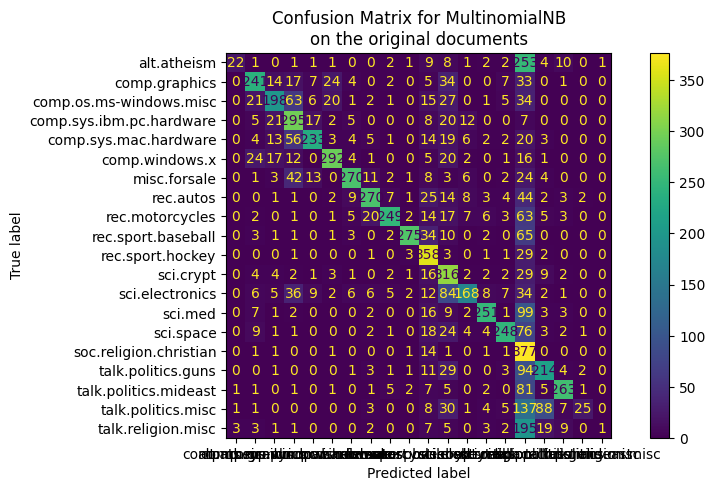

In [ ]:
graph_confusion_matrix(model_NB, y_test, results[0][4])

In [ ]:
from sklearn.naive_bayes import ComplementNB

cb = ComplementNB()
#cb.fit(x_train_tfidf, y_train)

#predicted = cb.predict(x_test_tfidf)
#print(accuracy_score(y_test, predicted))

results.append(benchmark(cb, "Complement Naive Baysian"))

________________________________________________________________________________
Training: 
ComplementNB()
train time: 0.099s
test time:  0.026s
accuracy:   0.715



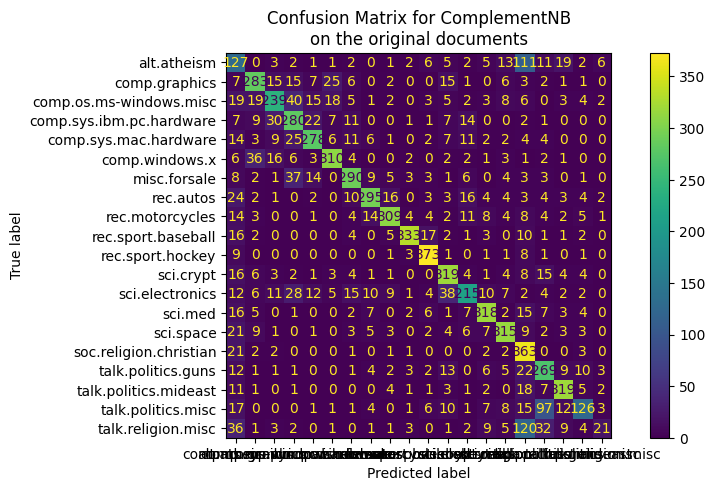

In [ ]:
graph_confusion_matrix(cb, y_test, results[1][4])

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
#lr.fit(x_train_tfidf, y_train)

#predicted = lr.predict(x_test_tfidf)
#print(accuracy_score(y_test, predicted))

results.append(benchmark(lr, "Logistic Regression"))

________________________________________________________________________________
Training: 
LogisticRegression(C=10000, max_iter=3000)
train time: 6.85e+02s
test time:  0.0305s
accuracy:   0.676
dimensionality: 101631
density: 1.0




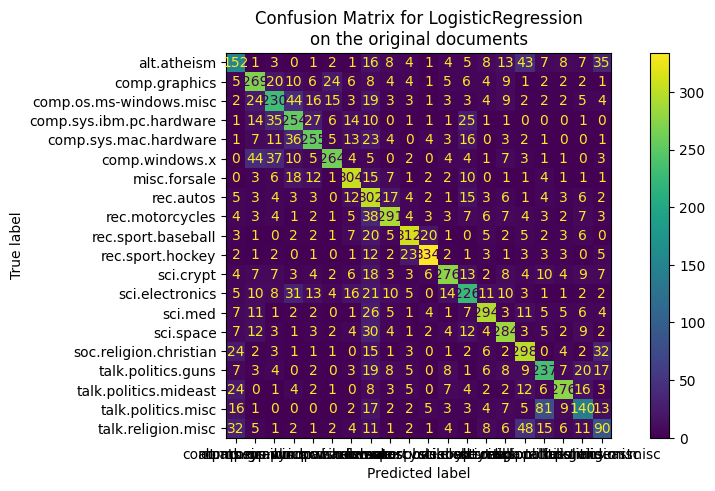

In [ ]:
graph_confusion_matrix(lr, y_test, results[2][4])

In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
#lsvc.fit(x_train_tfidf, y_train)

#predicted = lsvc.predict(x_test_tfidf)
#print(accuracy_score(y_test, predicted))

results.append(benchmark(lsvc, "Linear SVC"))

________________________________________________________________________________
Training: 
LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')
train time: 1.64e+02s
test time:  0.0158s
accuracy:   0.637
dimensionality: 101631
density: 0.011173264063130343




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


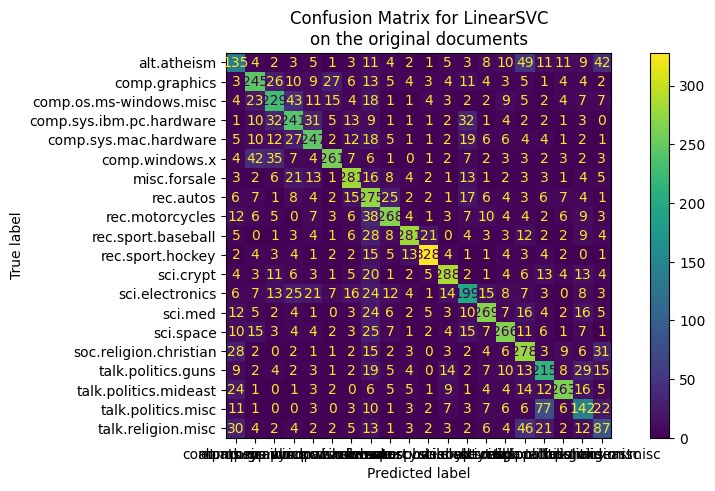

In [ ]:
graph_confusion_matrix(lsvc, y_test, results[3][4])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10, random_state=27)
#tree.fit(x_train_tfidf, y_train)

#predicted = tree.predict(x_test_tfidf)
#print(accuracy_score(y_test, predicted))

results.append(benchmark(tree, "Decision Tree"))

________________________________________________________________________________
Training: 
DecisionTreeClassifier(max_depth=10, random_state=27)
train time: 2.54s
test time:  0.0143s
accuracy:   0.2



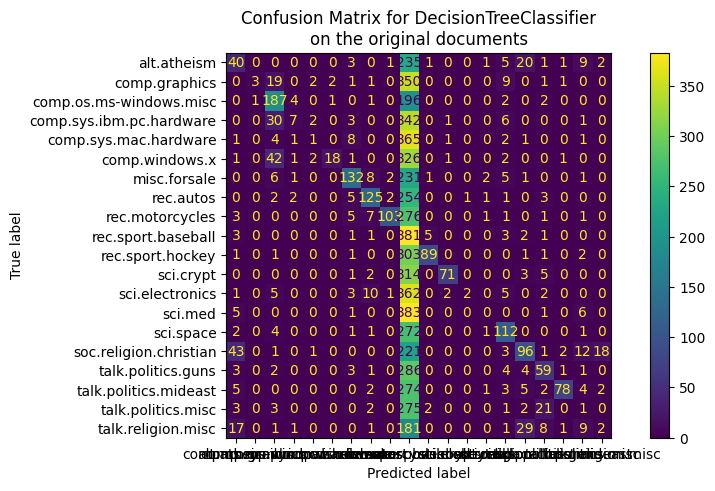

In [ ]:
graph_confusion_matrix(tree, y_test, results[4][4])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grbt = GradientBoostingClassifier(random_state=27, verbose=3)
#grbt.fit(x_train_tfidf, y_train)

#predicted = grbt.predict(x_test_tfidf)
#print(accuracy_score(y_test, predicted))

results.append(benchmark(grbt, "Gradient Boosting"))

________________________________________________________________________________
Training: 
GradientBoostingClassifier(random_state=27, verbose=3)
      Iter       Train Loss   Remaining Time 
         1           2.4772           18.64m
         2           2.3142           18.53m
         3           2.2001           17.91m
         4           2.1140           17.62m
         5           2.0419           17.54m
         6           1.9783           17.41m
         7           1.9243           17.26m
         8           1.8748           17.01m
         9           1.8306           16.79m
        10           1.7902           16.64m
        11           1.7513           16.47m
        12           1.7177           16.31m
        13           1.6858           16.15m
        14           1.6584           15.87m
        15           1.6300           15.70m
        16           1.6034           15.54m
        17           1.5789           15.36m
        18           1.5560           15.1

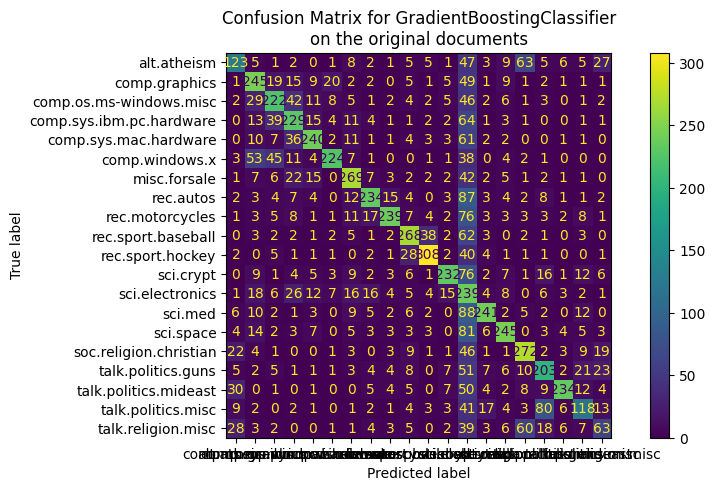

In [ ]:
graph_confusion_matrix(grbt, y_test, results[5][4])

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
#voting_classifier.fit(x_train_tfidf, y_train)

#predicted = voting_classifier.predict(x_test_tfidf) #테스트 데이터에 대한 예측
#print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

results.append(benchmark(voting_classifier, "Voting"))



________________________________________________________________________________
Training: 
VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')
train time: 1.73e+03s
test time:  0.321s
accuracy:   0.687



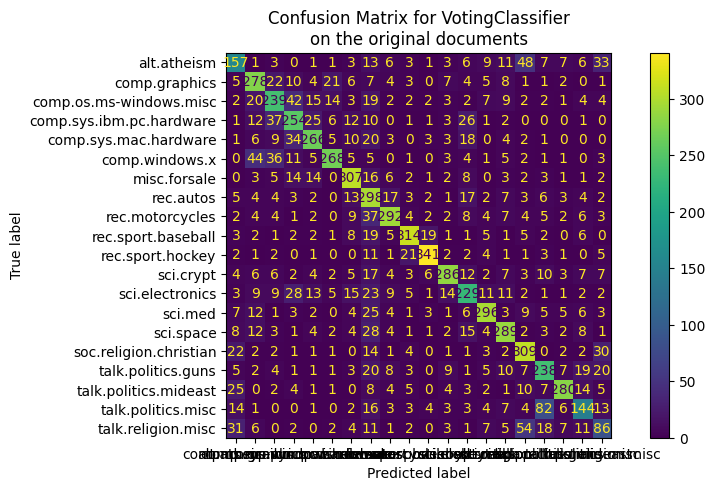

In [ ]:
graph_confusion_matrix(voting_classifier, y_test, results[6][4])

In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=15cd1b657a92fa7975e971ef859a3a713b345e1f092adb8ef0293fb637705c52
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
from keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
#y_tr = np_utils.to_categorical(y_train) # one_hot으로 변형
#y_te = np_utils.to_categorical(y_test) # 3 -> [0,0,0,1,0, ..]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)

{'the': 1, "'ax": 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'i': 7, 'in': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'this': 14, 'on': 15, 'be': 16, 'are': 17, 'have': 18, 'with': 19, 'not': 20, 'as': 21, '1': 22, 'or': 23, 'if': 24, 'but': 25, 'was': 26, 'they': 27, '0': 28, '2': 29, 'from': 30, 'by': 31, '3': 32, 'at': 33, "'": 34, 'x': 35, 'm': 36, 'an': 37, 'can': 38, 'will': 39, 'all': 40, 'my': 41, 'one': 42, 'there': 43, 'what': 44, 'would': 45, 'do': 46, 'he': 47, 'we': 48, 'about': 49, 'q': 50, 'has': 51, 'so': 52, 'your': 53, 'no': 54, 'some': 55, 'any': 56, '4': 57, 'max': 58, 'which': 59, '5': 60, 'me': 61, 'w': 62, 'who': 63, 'out': 64, '7': 65, 'more': 66, 'p': 67, 'were': 68, 'people': 69, 'their': 70, 'when': 71, 'like': 72, 'other': 73, 'r': 74, "don't": 75, 'g': 76, 'up': 77, 'just': 78, 's': 79, '8': 80, 'get': 81, 'only': 82, '6': 83, 'them': 84, 'had': 85, 'know': 86, 'how': 87, 'been': 88, 'c': 89, 'also': 90, 'his': 91, 'than': 92, 'use': 93, '9': 94, '

In [ ]:
print(tokenizer.word_counts)

OrderedDict([('i', 31293), ('was', 9567), ('wondering', 187), ('if', 9593), ('anyone', 1611), ('out', 4353), ('there', 6272), ('could', 2528), ('enlighten', 13), ('me', 4587), ('on', 14453), ('this', 14495), ('car', 787), ('saw', 419), ('the', 106423), ('other', 3880), ('day', 942), ('it', 21027), ('a', 45327), ('2', 8340), ('door', 201), ('sports', 97), ('looked', 260), ('to', 53090), ('be', 13807), ('from', 8314), ('late', 213), ('60s', 12), ('early', 340), ('70s', 10), ('called', 862), ('bricklin', 2), ('doors', 60), ('were', 4061), ('really', 1436), ('small', 604), ('in', 31102), ('addition', 232), ('front', 324), ('bumper', 23), ('separate', 160), ('rest', 362), ('of', 46963), ('body', 388), ('is', 30432), ('all', 6473), ('know', 3487), ('can', 6855), ('tellme', 1), ('model', 381), ('name', 1045), ('engine', 268), ('specs', 76), ('years', 1379), ('production', 94), ('where', 1898), ('made', 1216), ('history', 461), ('or', 10611), ('whatever', 352), ('info', 706), ('you', 16968), (

In [ ]:


print(tokenizer.texts_to_sequences(x_train))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = 10000
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1]

# 인덱스가 10000 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(x_train))

{'the': 1, "'ax": 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'i': 7, 'in': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'this': 14, 'on': 15, 'be': 16, 'are': 17, 'have': 18, 'with': 19, 'not': 20, 'as': 21, '1': 22, 'or': 23, 'if': 24, 'but': 25, 'was': 26, 'they': 27, '0': 28, '2': 29, 'from': 30, 'by': 31, '3': 32, 'at': 33, "'": 34, 'x': 35, 'm': 36, 'an': 37, 'can': 38, 'will': 39, 'all': 40, 'my': 41, 'one': 42, 'there': 43, 'what': 44, 'would': 45, 'do': 46, 'he': 47, 'we': 48, 'about': 49, 'q': 50, 'has': 51, 'so': 52, 'your': 53, 'no': 54, 'some': 55, 'any': 56, '4': 57, 'max': 58, 'which': 59, '5': 60, 'me': 61, 'w': 62, 'who': 63, 'out': 64, '7': 65, 'more': 66, 'p': 67, 'were': 68, 'people': 69, 'their': 70, 'when': 71, 'like': 72, 'other': 73, 'r': 74, "don't": 75, 'g': 76, 'up': 77, 'just': 78, 's': 79, '8': 80, 'get': 81, 'only': 82, '6': 83, 'them': 84, 'had': 85, 'know': 86, 'how': 87, 'been': 88, 'c': 89, 'also': 90, 'his': 91, 'than': 92, 'use': 93, '9': 94, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 10000
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)

In [ ]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [ ]:
print(tokenizer.texts_to_sequences(x_train))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tok_x_train = tokenizer.texts_to_sequences(x_train)
tok_x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import numpy as np

#y_tr = np_utils.to_categorical(y_train) # one_hot으로 변형
#y_te = np_utils.to_categorical(y_test) # 3 -> [0,0,0,1,0, ..]


# 패딩 적용
max_len = 100  # 최대 길이 설정 (As median : 83)
#padded_sequences = []
#for sequence in x_train_dtm:
#    if sequence.shape[0] < max_len:
#        padded_sequence = np.pad(sequence, (max_len - sequence.shape[0], 0), mode='constant')
#    else:
 #       padded_sequence = sequence[-max_len:]
 #   padded_sequences.append(padded_sequence)

#x_train1 = tf.keras.preprocessing.sequence.pad_sequences(x_train_dtm.toarray(),
#                                                        value=0,
#                                                        padding='pre',
#                                                        maxlen=max_len)
#x_test1 = tf.keras.preprocessing.sequence.pad_sequences(x_test_dtm.toarray(),
#                                                       value=0,
#                                                       padding='pre',
#                                                       maxlen = max_len)

x_train1 = tf.keras.preprocessing.sequence.pad_sequences(tok_x_train, maxlen=100)
x_test1 = tf.keras.preprocessing.sequence.pad_sequences(tok_x_test, maxlen=100)

vocab_size = 10000
word_vector_dim = 200

model = tf.keras.Sequential()
#model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
#model.add(tf.keras.layers.Embedding(np.max(x_train1), len(x_train1[0])))
model.add(tf.keras.layers.Embedding(10000, 100))
#model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.LSTM(len(x_train1[0])))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax')) # 클래스가 총 46개라 마지막층은 46개의 결과가 나와야합니다.

model.summary()

model.compile(optimizer='adam',
              #loss='SparseCategoricalCrossentropy', # 라벨이 46개이기 때문에 손실함수를 전과 다르게 사용합니다.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(x_train1, y_tr, epochs=15, batch_size=64, validation_data=(x_test1, y_te), verbose=1)


print("_" * 80)
print("Training: ")
print("model")
    #t0 = time()
t0 = datetime.now()
model.fit(x_train1, y_tr, epochs=15, batch_size=64, validation_data=(x_test1, y_te), verbose=1)

train_time = datetime.now() - t0
train_time = train_time.total_seconds()
print(f"train time: {train_time:.3}s")

t0 = datetime.now()
pred = model.predict(x_test1)
predicted_classes = np.argmax(pred, axis=1)


test_time = datetime.now() - t0
test_time = test_time.total_seconds()
print(f"test time:  {test_time:.3}s")





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1000000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 1088164 (4.15 MB)
Trainable params: 1088164 (4.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
________________________________________________________________________________
Training: 
model
Epoch 1/15
177/177 [==============================

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
score = metrics.accuracy_score(y_test, predicted_classes)
print(f"accuracy:   {score:.3}")

if hasattr('model', "coef_"):
      print(f"dimensionality: {model.coef_.shape[1]}")
      print(f"density: {density(model.coef_)}")
      print()

print()
clf_descr = "LSTM"

results.append((clf_descr, score, train_time, test_time, pred, predicted_classes))

accuracy:   0.503



In [ ]:
results

[['Multinomial Naive Baysian',
  'Complement Naive Baysian',
  'Logistic Regression',
  'Linear SVC',
  'Decision Tree',
  'Gradient Boosting',
  'Voting',
  'LSTM'],
 [0.6062134891131173,
  0.7145512480084971,
  0.6755177907594264,
  0.6370154009559214,
  0.20007966011683484,
  0.5905469994689325,
  0.6865374402549124,
  0.5030536378120021],
 [0.099479,
  0.111834,
  684.882813,
  163.73501,
  2.540864,
  1084.162232,
  1725.802785,
  597.460721],
 [0.032066,
  0.024758,
  0.030544,
  0.015841,
  0.014312,
  0.269588,
  0.321245,
  10.703776]]

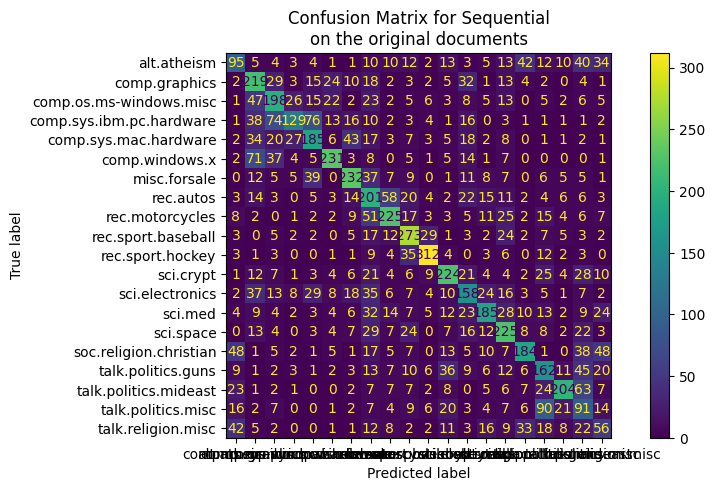

In [ ]:
import numpy as np

#predicted = model.predict(x_test1)
#predicted_classes = np.argmax(predicted, axis=1)

#results.append(benchmark(model, "LSTM"))

graph_confusion_matrix(model, y_test, results[7][5])

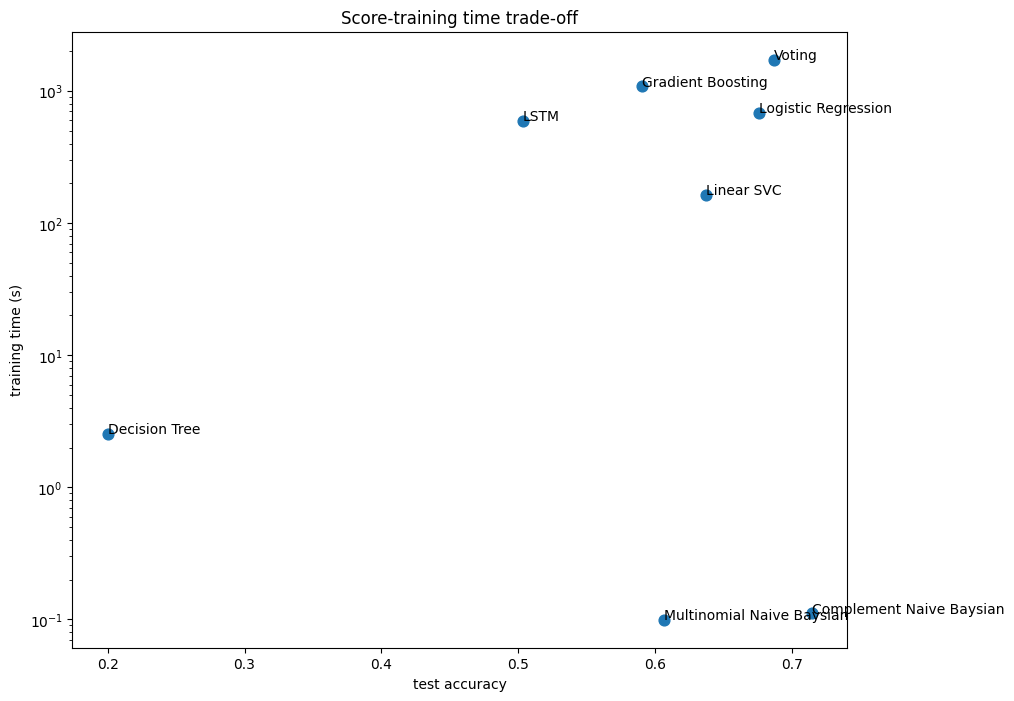

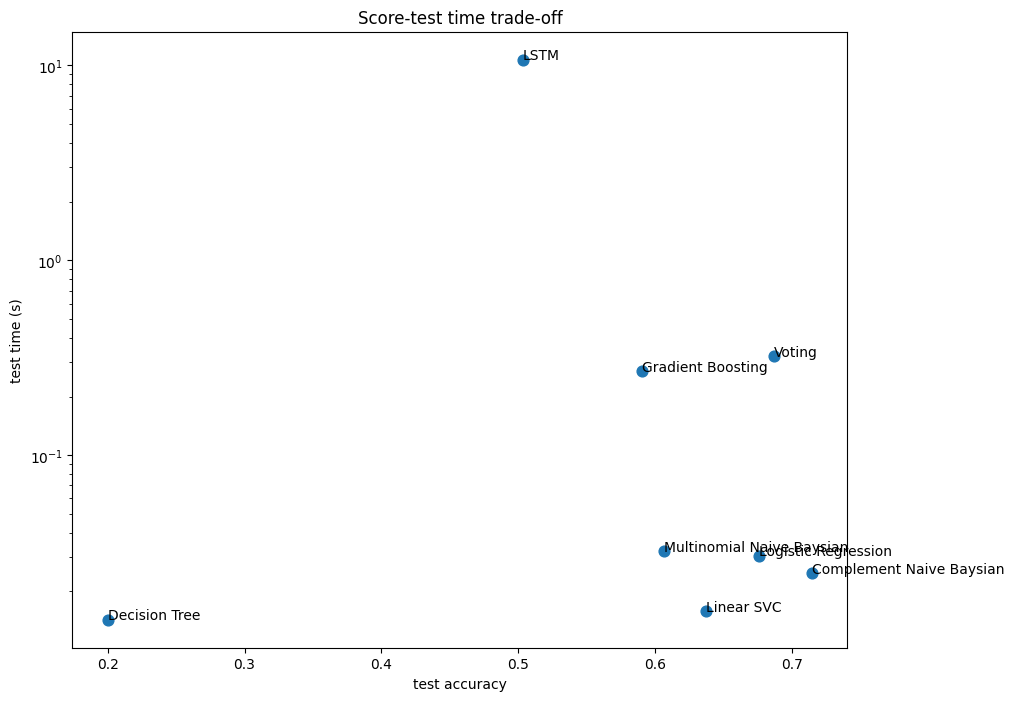

In [ ]:
import numpy as np

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

In [ ]:
x_test_tfidf.toarray().shape

(7532, 101631)

In [ ]:
results1[0][4].shape

(7532,)

In [ ]:
reduced_data

array([[ 0.12691196, -0.03613261],
       [-0.01067347,  0.12183804],
       [-0.15833743, -0.03589829],
       ...,
       [ 0.11841905,  0.03443241],
       [-0.07305547,  0.05698745],
       [ 0.00475793,  0.07257821]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(x_test_tfidf.toarray())



In [ ]:
import pandas as pd
df = pd.DataFrame(reduced_data, columns=['f1','f2'])

In [ ]:
df['cluster'] = results1[0][4]

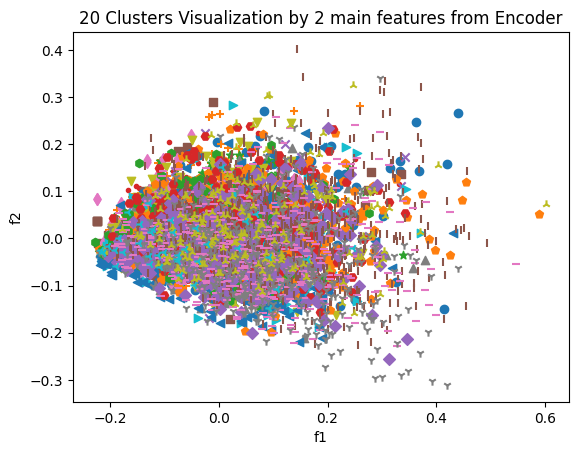

In [118]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index
marker3_ind = df[df['cluster']==3].index
marker4_ind = df[df['cluster']==4].index
marker5_ind = df[df['cluster']==5].index
marker6_ind = df[df['cluster']==6].index
marker7_ind = df[df['cluster']==7].index
marker8_ind = df[df['cluster']==8].index
marker9_ind = df[df['cluster']==9].index
marker10_ind = df[df['cluster']==10].index
marker11_ind = df[df['cluster']==11].index
marker12_ind = df[df['cluster']==12].index
marker13_ind = df[df['cluster']==13].index
marker14_ind = df[df['cluster']==14].index
marker15_ind = df[df['cluster']==15].index
marker16_ind = df[df['cluster']==16].index
marker17_ind = df[df['cluster']==17].index
marker18_ind = df[df['cluster']==18].index
marker19_ind = df[df['cluster']==19].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df.loc[marker0_ind,'f1'], y=df.loc[marker0_ind,'f2'], marker='o')
plt.scatter(x=df.loc[marker1_ind,'f1'], y=df.loc[marker1_ind,'f2'], marker='+')
plt.scatter(x=df.loc[marker2_ind,'f1'], y=df.loc[marker2_ind,'f2'], marker='*')
plt.scatter(x=df.loc[marker3_ind,'f1'], y=df.loc[marker3_ind,'f2'], marker='.')
plt.scatter(x=df.loc[marker4_ind,'f1'], y=df.loc[marker4_ind,'f2'], marker='x')
plt.scatter(x=df.loc[marker5_ind,'f1'], y=df.loc[marker5_ind,'f2'], marker='s')
plt.scatter(x=df.loc[marker6_ind,'f1'], y=df.loc[marker6_ind,'f2'], marker='d')
plt.scatter(x=df.loc[marker7_ind,'f1'], y=df.loc[marker7_ind,'f2'], marker='^')
plt.scatter(x=df.loc[marker8_ind,'f1'], y=df.loc[marker8_ind,'f2'], marker='v')
plt.scatter(x=df.loc[marker9_ind,'f1'], y=df.loc[marker9_ind,'f2'], marker='>')
plt.scatter(x=df.loc[marker10_ind,'f1'], y=df.loc[marker10_ind,'f2'], marker='<')
plt.scatter(x=df.loc[marker11_ind,'f1'], y=df.loc[marker11_ind,'f2'], marker='p')
plt.scatter(x=df.loc[marker12_ind,'f1'], y=df.loc[marker12_ind,'f2'], marker='h')
plt.scatter(x=df.loc[marker13_ind,'f1'], y=df.loc[marker13_ind,'f2'], marker='H')
plt.scatter(x=df.loc[marker14_ind,'f1'], y=df.loc[marker14_ind,'f2'], marker='D')
plt.scatter(x=df.loc[marker15_ind,'f1'], y=df.loc[marker15_ind,'f2'], marker='|')
plt.scatter(x=df.loc[marker16_ind,'f1'], y=df.loc[marker16_ind,'f2'], marker='_')
plt.scatter(x=df.loc[marker17_ind,'f1'], y=df.loc[marker17_ind,'f2'], marker='1')
plt.scatter(x=df.loc[marker18_ind,'f1'], y=df.loc[marker18_ind,'f2'], marker='2')
plt.scatter(x=df.loc[marker19_ind,'f1'], y=df.loc[marker19_ind,'f2'], marker='3')

plt.xlabel('f1')
plt.ylabel('f2')
plt.title('20 Clusters Visualization by 2 main features from Encoder')
plt.show()

In [1]:
import tensorflow as tf

# 학습에 필요한 설정값들을 정의합니다.
learning_rate_RMSProp = 0.02
learning_rate_GradientDescent = 0.5
num_epochs = 100         # 반복횟수
batch_size = 256
display_step = 1         # 몇 Step마다 log를 출력할지 결정합니다.
input_size =  101631        # MNIST 데이터 input (이미지 크기: 28*28)
hidden1_size = 128       # 첫번째 히든레이어의 노드 개수
hidden2_size = 2        # 두번째 히든레이어의 노드 개수

# 입력을 받기 위한 플레이스홀더를 정의합니다.
#x = tf.placeholder(tf.float32, shape=[None, input_size])   # 인풋을 위한 플레이스홀더를 정의합니다.
#y = tf.placeholder(tf.float32, shape=[None, 10])           # True MNIST 숫자값

# Autoencoder 구조를 정의합니다.
def build_autoencoder(x):
  # 인코딩(Encoding) - 6 -> 4 -> 2
  Wh_1 = tf.Variable(tf.random.normal([input_size, hidden1_size]))
  bh_1 = tf.Variable(tf.random.normal([hidden1_size]))
  #H1_output = tf.nn.sigmoid(tf.matmul(x, Wh_1) +bh_1)
  H1_output = tf.nn.sigmoid(tf.matmul(x, tf.cast(Wh_1, x.dtype)) + tf.cast(bh_1, x.dtype))

  Wh_2 = tf.Variable(tf.random.normal([hidden1_size, hidden2_size]))
  bh_2 = tf.Variable(tf.random.normal([hidden2_size]))
  #H2_output = tf.nn.sigmoid(tf.matmul(H1_output, Wh_2) +bh_2)
  H2_output = tf.nn.sigmoid(tf.matmul(H1_output, tf.cast(Wh_2, H1_output.dtype)) + tf.cast(bh_2, H1_output.dtype))
  # 디코딩(Decoding) 64 -> 128 -> 784
  #Wh_3 = tf.Variable(tf.random.normal([hidden2_size, hidden1_size]))
  #bh_3 = tf.Variable(tf.random.normal([hidden1_size]))
  #H3_output = tf.nn.sigmoid(tf.matmul(H2_output, Wh_3) +bh_3)
  #Wo = tf.Variable(tf.random.normal([hidden1_size, input_size]))
  #bo = tf.Variable(tf.random.normal([input_size]))
  #X_reconstructed = tf.nn.sigmoid(tf.matmul(H3_output,Wo) + bo)

  #return X_reconstructed, H2_output
  return H2_output

# Softmax 분류기를 정의합니다.
def build_softmax_classifier(x):
  W_softmax = tf.Variable(tf.zeros([hidden2_size, 20]))    # 원본 MNIST 이미지(784) 대신 오토인코더의 압축된 특징(64)을 입력값으로 받습니다.
  b_softmax = tf.Variable(tf.zeros([20]))
  y_pred = tf.nn.softmax(tf.matmul(x, W_softmax) + b_softmax)

  return y_pred

# Autoencoder를 선언합니다.
tensor = tf.constant(x_test_tfidf.toarray())
#tensor.astype('float64')
#tf.cast(tensor, tf.float64)
#double_tensor = tf.dtypes.cast(tensor, tf.float64)

#tensor.type('torch.DoubleTensor')

#train_data = tf.data.Dataset.from_tensor_slices(tensor)
#train_data = train_data.shuffle(60000).batch(batch_size)

extracted_features = build_autoencoder(tensor) # Autoencoder의 Reconstruction 결과(784), 압축된 Features(64)

NameError: name 'x_test_tfidf' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(x_test_tfidf.toarray())

df = pd.DataFrame(reduced_data, columns=['f1','f2'])
#kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
#kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = results1[0][4]
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

ValueError: cannot reshape array of size 7532 into shape (136,142)

In [ ]:
import matplotlib.pyplot as plt


reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

NameError: name 'data' is not defined

# https://real-myeong.tistory.com/61  
데이터길이 분포 플롯, 클래스 분포 플롯

# https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
# 각 클래스별 히트맵 그림 가능 (클래스별 상관성분석 가능)
# 각 클래스별로 단어 빈도수 추출 가능 -> 이건 불가능...
# 문서를 정확하게 클래스 분류할수 있는 알고리즘이 무엇인가? (정확도 표로 표현, 알고리즘별로 훈련시간,정확도 플롯으로 표현가능. 어떤 모델이 효율적인지 파악가능)
# 클래스별 클러스터링 플롯 표현 가능? (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

# 카테고리 종류 (https://scikit-learn.org/stable/auto_examples/bicluster/plot_bicluster_newsgroups.html#sphx-glr-auto-examples-bicluster-plot-bicluster-newsgroups-py)

